In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit import QuantumRegister
from qiskit import ClassicalRegister

from qiskit.visualization import plot_histogram, plot_state_city

from qiskit_aer import AerSimulator

import numpy as np

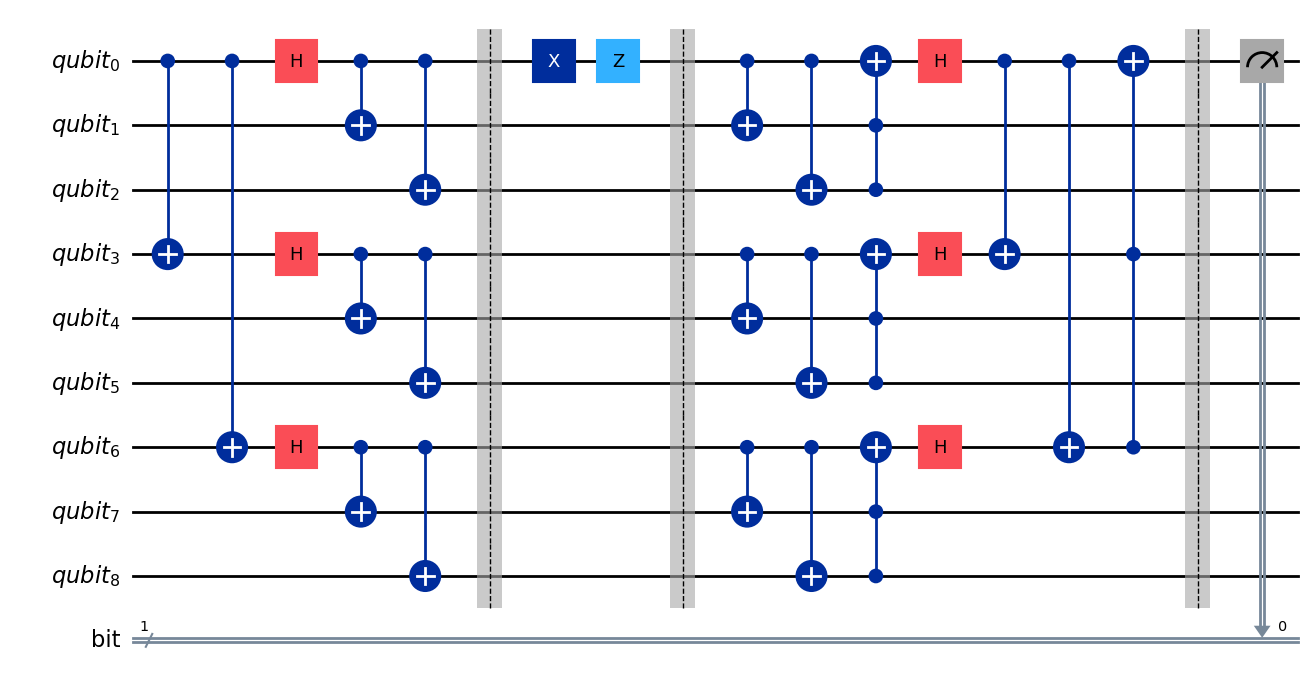

In [3]:
# Create a new circuit with two qubits
qubit = QuantumRegister(9,'qubit')
bit = ClassicalRegister(1,'bit')

circuit = QuantumCircuit(qubit, bit)

  
# CNOT
circuit.cx(qubit[0], qubit[3]);              circuit.cx(qubit[0], qubit[6])

# HADAMARD
circuit.h(qubit[0]);                         circuit.h(qubit[3]);                         circuit.h(qubit[6])

# CNOT
circuit.cx(qubit[0], qubit[1]);              circuit.cx(qubit[3], qubit[4]);              circuit.cx(qubit[6], qubit[7])
circuit.cx(qubit[0], qubit[2]);              circuit.cx(qubit[3], qubit[5]);              circuit.cx(qubit[6], qubit[8])

circuit.barrier() ###############################################

#Bit flip error
circuit.x(qubit[0])

#Phase flip error
circuit.z(qubit[0])

circuit.barrier() ###############################################

# CNOT
circuit.cx(qubit[0], qubit[1]);              circuit.cx(qubit[3], qubit[4]);              circuit.cx(qubit[6], qubit[7])
circuit.cx(qubit[0], qubit[2]);              circuit.cx(qubit[3], qubit[5]);              circuit.cx(qubit[6], qubit[8])

# TOFFOLI
circuit.ccx(qubit[2], qubit[1], qubit[0]);   circuit.ccx(qubit[5], qubit[4], qubit[3]);   circuit.ccx(qubit[8], qubit[7], qubit[6])

# HADAMARD
circuit.h(qubit[0]);                         circuit.h(qubit[3]);                         circuit.h(qubit[6])

# CNOT
circuit.cx(qubit[0], qubit[3]);              circuit.cx(qubit[0], qubit[6])

# TOFFOLI
circuit.ccx(qubit[6], qubit[3], qubit[0]); 

circuit.barrier() ###############################################

circuit.measure(qubit[0], bit[0])

# Draw the circuit
circuit.draw("mpl", filename='shor_protocol.png')

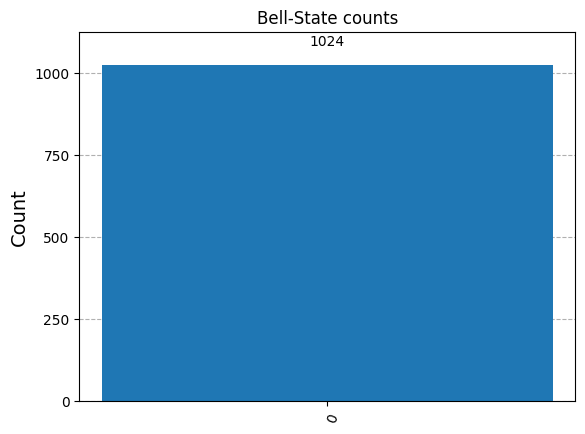

In [5]:
# Transpile for simulator
simulator = AerSimulator()
circuit = transpile(circuit, simulator)

# Run and get counts
result = simulator.run(circuit, shots="1024").result()
counts = result.get_counts(circuit)
plot_histogram(counts, title='Bell-State counts')